# Acoplamento eletroacústico (microfone capacitivo de medição)

O desenho esquemático do microfone simplificado é:

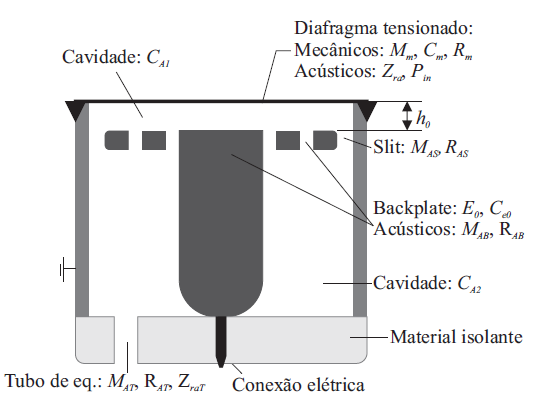

O circuito eletromecânico do sistema é dado na figura:

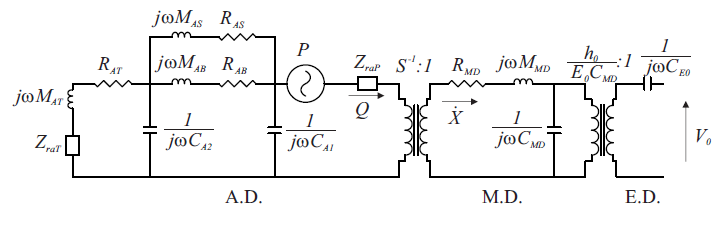

Vamos considerar uma pressão sonora de entrada e medir a tensão de saída do sensor.

In [1]:
import numpy as np
from scipy import special
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 14})

def ac_compliance(vol, rho0 = 1.21, c0 = 343):
    Ca = vol/(rho0*c0**2)
    return Ca

def ac_oo_smalltube(a, l, freq, flanged = False, rho0 = 1.21, c0 = 343, eta = 1.84e-5):
    if flanged:
        ll = l + 0.85*a
    else:
        ll = l + 0.61*a
    # compliance and mass
    Ra = 8*eta*ll/(np.pi*a**4)
    Ma = 4*rho0*ll/(3*np.pi*a**2)
    # impedance
    omega = 2 *np.pi*freq
    Za = Ra + 1j*omega*Ma
    return Ra, Ma, Za

def ac_slit(h, b, l, freq, rho0 = 1.21, c0 = 343, eta = 1.84e-5):
    # compliance and mass
    Ra = 32*eta*l/((h**3)*b)
    Ma = 6*rho0*l/(5*h*b)
    # impedance
    omega = 2 *np.pi*freq
    Za = Ra + 1j*omega*Ma
    return Ra, Ma, Za

def zrad_cylinder(a, freq, rho0 = 1.21, c0 = 343):
    # Equivalent circuit
    Ra1 = (0.504 * rho0 * c0) / (np.pi * a**2)
    Ra2 = (rho0 * c0) / (np.pi * a**2)
    Ca1 = (5.44 * a**3) / (rho0 * c0**2)
    Ma1 = (0.1952 * rho0) / a
    # Equivalent impedance
    omega = 2*np.pi*freq
    Zrad_eq=(-(omega**2)*Ma1*Ra1*Ra2*Ca1+1j*omega*Ma1*(Ra1+Ra2))/\
        (Ra1+Ra2-(omega**2)*Ma1*Ra1*Ca1+1j*omega*(Ra1*Ra2*Ca1+Ma1))

    return Ra1, Ra2, Ca1, Ma1, Zrad_eq

# Parâmetros do microfone

In [2]:
# Parametros do diafragma
a = 4.45e-3; # meia polegada
S = np.pi*a**2 # area
E0 = 200 # Polarization voltage
h0 = 20.77e-6 # Backplate-diaphragm distance 19e-6
Tm0 = 3160 # Tensão Mec
rhom = 8900 # Density of diaphragm 
tm = 5e-6 # thickness of diaphragm


Mm = 4*rhom*tm*S/3 # Massa do diafragma
Mad = Mm/S**2 
Cm = (1/(8*np.pi*Tm0))
Cad = Cm*S**2
Rm = 0.4

Ra1, Ra2, Ca1, Ma1, Zrad_eq = zrad_cylinder(a, 1, rho0 = 1.21, c0 = 343)


print(r'Mm é {} [kg]'.format(Mm))
print(r'Cm é {} [m/N]'.format(Cm))
print(r'Rm é {} [Ns/m]'.format(Rm))

#############################################
print(r'Ra1 é {} [Pa s/m^3]'.format(Ra1))
print(r'Ra2 é {} [Pa s/m^3]'.format(Ra2))
print(r'Ca1 é {} [m^3/Pa]'.format(Ca1))
print(r'Ma1 é {} [kg/m^4]'.format(Ma1))

Mm é 3.691209052347572e-06 [kg]
Cm é 1.2591372080055011e-05 [m/N]
Rm é 0.4 [Ns/m]
Ra1 é 3362328.425182717 [Pa s/m^3]
Ra2 é 6671286.557902216 [Pa s/m^3]
Ca1 é 3.3674823043105737e-12 [m^3/Pa]
Ma1 é 53.07685393258427 [kg/m^4]


# Slit

Até aqui não haviamos falado sobre o slit, dado no esquema

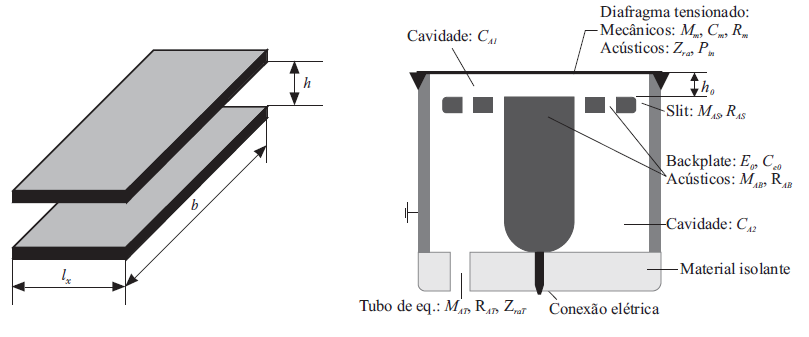

Cuja impedância é dada por uma Massa acústica em série com uma Resistência acústica

\begin{equation}
Z_{A} = \frac{32 \eta l}{h^3 b} + \mathrm{j} \omega \frac{6 \rho_0 l}{5 h b}
\end{equation}

Podemos considerar
- $b$ circunferência do sensor;
- $h$ distância entre carcaça e início do backplate;
- $l$ comprimento do backplate

In [3]:
# Parametros do circuito acústico
# Backplate
ab = 3.61e-3 # raio do backplate
afb = 0.51e-3
Sfb = np.pi*afb**2
lfb = 0.84e-3
Rab_1f, Mab_1f, Zab_1f = ac_oo_smalltube(afb, lfb, 1, flanged = False)
#Mab = (4/3) * 1.21 * lfb/(np.pi*afb**2)
#Rab = 8*1.84e-5*lfb/(np.pi*afb**4);
Rab = Rab_1f/6
Mab = Mab_1f/6

# Slit
hs = a-ab # distancia entre carcaça e backplate
ls = 0.3e-3; 
bs = 2*np.pi*a
Ras, Mas, Zas = ac_slit(hs, bs, ls, 1)

# Tubo de eq
aT = 0.04e-3
ST = np.pi*aT**2
lT = 2e-3
Rat, Mat, Zat = ac_oo_smalltube(aT, lT, 1, flanged = True)

# Cavidades
V_A1 = S * h0
Ca1 = ac_compliance(V_A1)

Hmic = 3.35e-2
V_A2 = 1.264e-7;
Ca2 = ac_compliance(V_A2)


print(r'Rab é {} [Pa s/m^3]'.format(Rab))
print(r'Mab é {} [kg/m^4]'.format(Mab))
print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
print(r'Ras é {} [Pa s/m^3]'.format(Ras))
print(r'Mas é {} [kg/m^4]'.format(Mas))
print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
print(r'Rat é {} [Pa s/m^3]'.format(Rat))
print(r'Mat é {} [kg/m^4]'.format(Mat))
print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
print(r'Ca1 é {} [m^3/Pa]'.format(Ca1))
print(r'Ca2 é {} [m^3/Pa]'.format(Ca2))

Rab é 132873.70242205405 [Pa s/m^3]
Mab é 378.7875407606094 [kg/m^4]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Ras é 10658.873757987914 [Pa s/m^3]
Mas é 18.54678791086934 [kg/m^4]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Rat é 37227932738.62523 [Pa s/m^3]
Mat é 652837.6610686454 [kg/m^4]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Ca1 é 9.076800304482719e-15 [m^3/Pa]
Ca2 é 8.879192336301656e-13 [m^3/Pa]


# Referenciando ao lado acústico

In [4]:
print(r'Mma é {} [kg/m^4] '.format(Mm/S**2))
print(r'Cma é {} [m^3/Pa] '.format(Cm*S**2))
print(r'Rma é {} [Pas/m^3]'.format(Rm/S**2))
Ce0 = 17.9e-12
print(r'Ce0 é {} [m^3/Pa]'.format(Ce0*(((S*E0*Cm)/h0)**2)))
Rout = 10e6
print(r'Rma é {} [Pas/m^3]'.format(Rout*(h0/(S*E0*Cm))**2))
print('Fator de conversão {}'.format((h0/(S*E0*Cm))))

Mma é 953.7374866930061 [kg/m^4] 
Cma é 4.8731844193868746e-14 [m^3/Pa] 
Rma é 103352313.36588088 [Pas/m^3]
Ce0 é 1.0184176888234955e-15 [m^3/Pa]
Rma é 175762854440.19122 [Pas/m^3]
Fator de conversão 132.57558389092284


# Sensibilidade

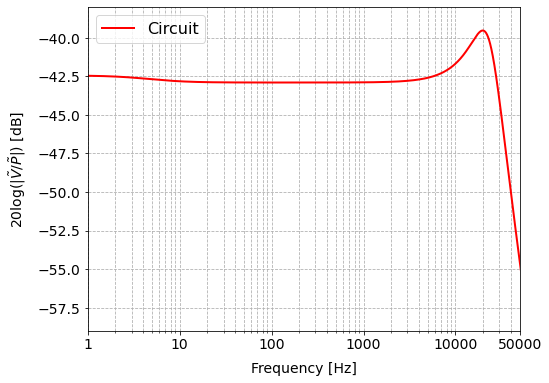

In [5]:
sim_1_file = 'vout_bfore_corr.txt'
data = np.loadtxt(sim_1_file, skiprows=1)
freq_s = data[:,0]
V_s1 = (data[:,1] + 1j*data[:,2])/(h0/(S*E0*Cm))

###############################################################################
fig = plt.figure(figsize = (6,4.5))
ax = fig.add_axes([0, 0, 1, 1])
ax.semilogx(freq_s, 20*np.log10(np.abs(V_s1)), '-r', linewidth = 2,
            label = "Circuit")
ax.set_xlabel('Frequency [Hz]', labelpad=10)
ax.set_ylabel(r'$20 \mathrm{log}(|\tilde{V}/\tilde{P}|)$ [dB]', labelpad=10)
ax.legend(frameon=True, fontsize=16)
ax.grid(b=None, which='both', axis='both',linestyle = '--')
ax.set_xlim((1,50000))
ax.set_ylim((-59,-38))
ax.set_xticks([1, 10, 100, 1000, 10000, 50000])
ax.set_xticklabels(('1', '10', '100', '1000', '10000', '50000'));